In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train  = x_train/255
x_test  = x_test/255

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [ ]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [ ]:
num_classes = 10

In [ ]:
# we will do some mild image pre-processing for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [ ]:
batch_size = 32
epochs = 100
model_history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/100
1562/1562 [==============================] - 61s 31ms/step - loss: 1.4457 - accuracy: 0.4893 - val_loss: 1.0561 - val_accuracy: 0.6192
Epoch 2/100
1562/1562 [==============================] - 42s 27ms/step - loss: 1.0380 - accuracy: 0.6304 - val_loss: 0.9427 - val_accuracy: 0.6681
Epoch 3/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8907 - accuracy: 0.6850 - val_loss: 0.7922 - val_accuracy: 0.7250
Epoch 4/100
1562/1562 [==============================] - 43s 28ms/step - loss: 0.8071 - accuracy: 0.7163 - val_loss: 0.7918 - val_accuracy: 0.7417
Epoch 5/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.7445 - accuracy: 0.7390 - val_loss: 0.8006 - val_accuracy: 0.7276
Epoch 6/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.6871 - accuracy: 0.7590 - val_loss: 0.6099 - val_accuracy: 0.7907
Epoch 7/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.6471 - accuracy: 0.7750 - val_loss: 0

In [ ]:
model.save('M1DA.h5')

In [ ]:
from keras import models
model = models.load_model('M1DA.h5')

In [ ]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# we will do some mild image pre-processing for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)       

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau


batch_size = 32
epochs = 100



filepath = 'M1-DA-weights.hdf5'
model_chk = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                            save_best_only=True,
                            save_weights_only=True, mode='auto',
                            period=1)

csv_log = CSVLogger('M1-DA-training.log')

model_history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[model_chk, csv_log])

Epoch 1/100
1562/1562 [==============================] - 41s 26ms/step - loss: 1.4360 - accuracy: 0.4959 - val_loss: 1.0880 - val_accuracy: 0.6228
Epoch 2/100
1562/1562 [==============================] - 40s 26ms/step - loss: 1.0322 - accuracy: 0.6332 - val_loss: 0.8090 - val_accuracy: 0.7121
Epoch 3/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.8815 - accuracy: 0.6898 - val_loss: 0.7600 - val_accuracy: 0.7307
Epoch 4/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.7941 - accuracy: 0.7217 - val_loss: 0.8353 - val_accuracy: 0.7136
Epoch 5/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.7265 - accuracy: 0.7448 - val_loss: 0.7087 - val_accuracy: 0.7581
Epoch 6/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.6858 - accuracy: 0.7595 - val_loss: 0.5996 - val_accuracy: 0.7909
Epoch 7/100
1562/1562 [==============================] - 40s 25ms/step - loss: 0.6357 - accuracy: 0.7773 - val_loss: 0

In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


# This time we will only use the test set:
_, (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_test = np_utils.to_categorical(y_test, num_classes)

10000 test samples


In [ ]:
import os

weights_path = 'M1-DA-weights.hdf5'
out_dir = 'M1-DA-features'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()
model.load_weights(weights_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 activation_17 (Activation)  (None, 32, 32, 32)       

In [ ]:
import numpy as np

feat_extractor = Model(inputs=model.input,
                       outputs=model.get_layer('fc1').output)

features = feat_extractor.predict(x_test, batch_size=batch_size)

np.save(os.path.join(out_dir, 'fc1_features.npy'), features)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_2dim.npy'), pca_features)

In [ ]:
tx, ty = pca_features[:,0], pca_features[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

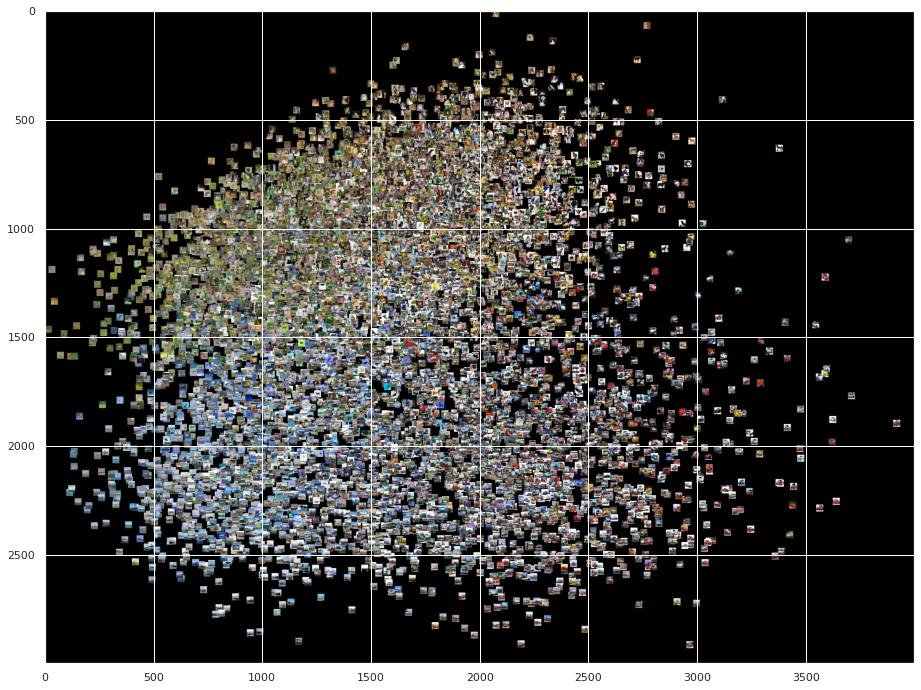

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_pca.jpg"))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_50dim.npy'), pca_features)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(pca_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_pca_50dim_tsne.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

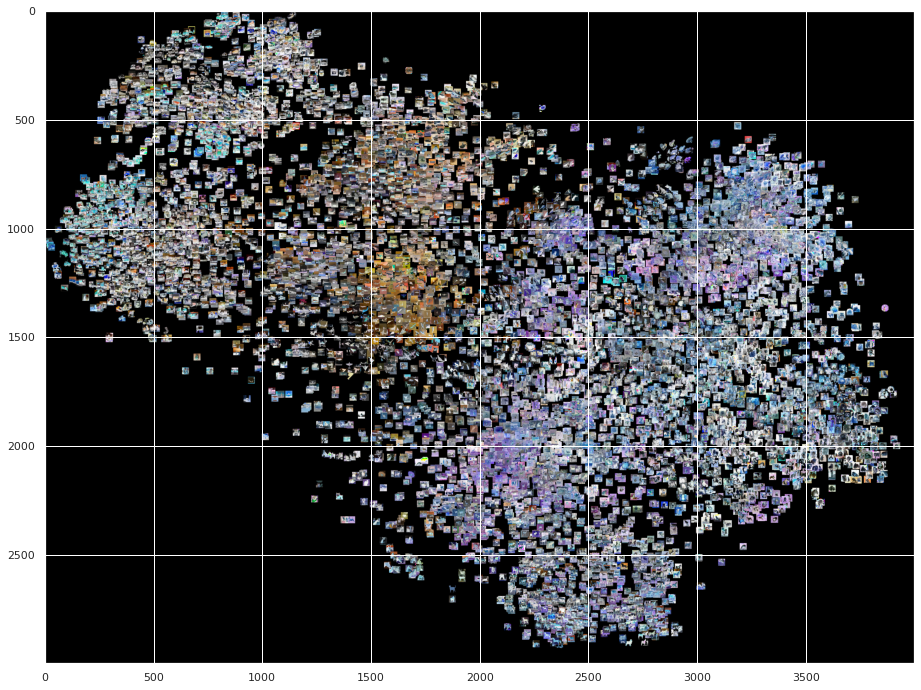

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
from sklearn.manifold import TSNE

features = np.load(os.path.join(out_dir, 'fc1_features.npy'))
tsne = TSNE().fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_tsne_default.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

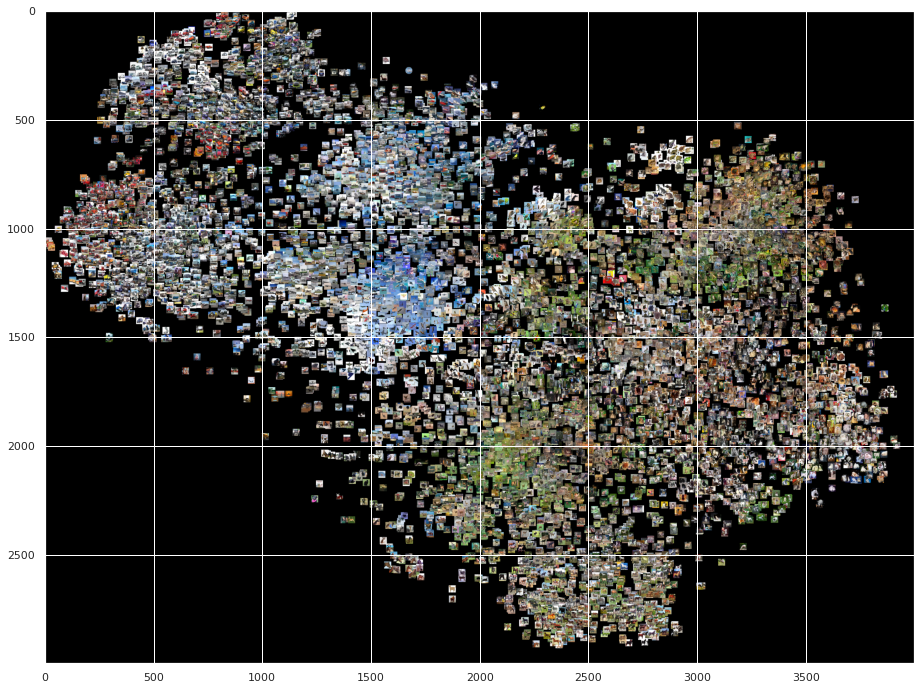

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_features_tsne_default.jpg"))

In [ ]:
# have to re-load cifar to get y_test back in its original form
_, (x_test, y_test) = cifar10.load_data()

y_test = np.asarray(y_test)

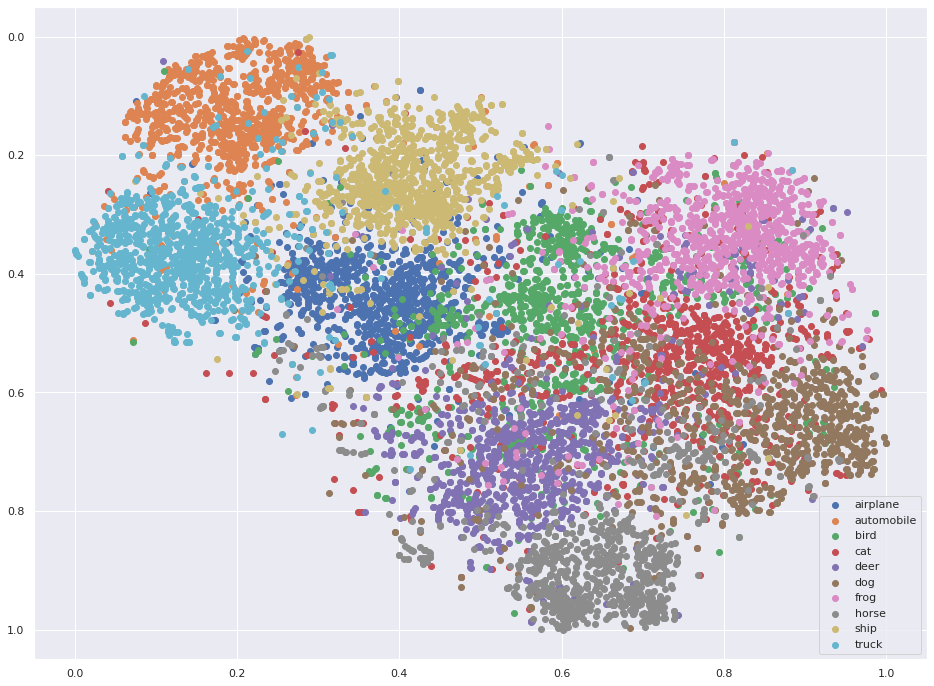

In [ ]:
plt.figure(figsize = (16,12))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(classes)):
    y_i = y_test == i
    plt.scatter(tx[y_i[:, 0]], ty[y_i[:, 0]], label=classes[i])
plt.legend(loc=4)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(out_dir, "fc1_features_tsne_default_pts.jpg"), bbox_inches='tight')
plt.show()

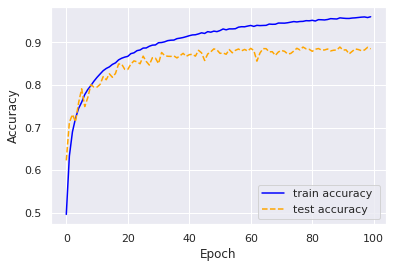

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

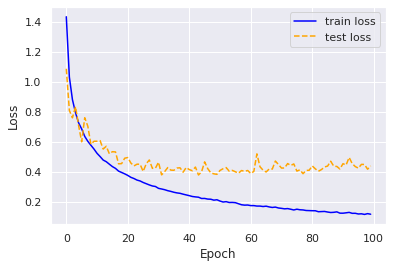

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

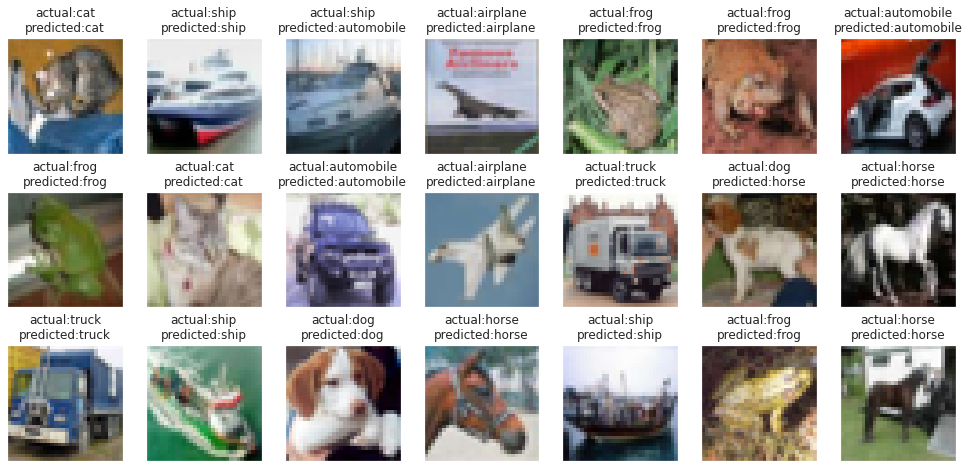

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

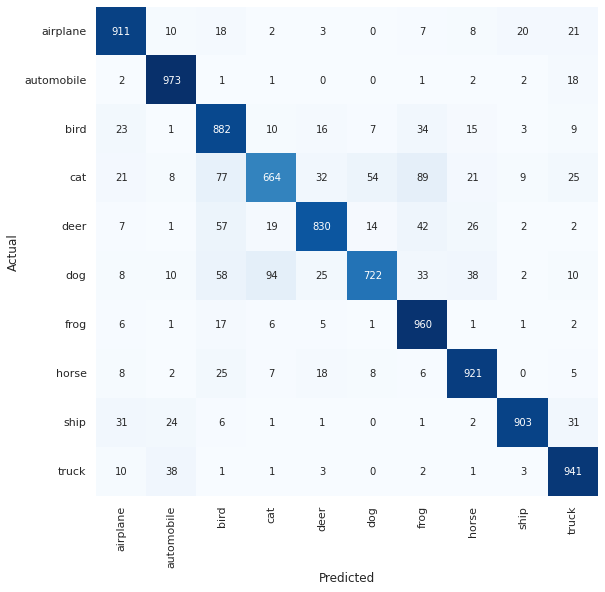

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()